In [37]:
# Make sure that you have all these libaries available to run the code successfully
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [38]:
data = pd.read_csv('AAPL.csv')
df = pd.DataFrame(data)

In [39]:
df.set_index("Date", inplace=True)

In [40]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950493,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943367,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133541,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601864,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447346,82271200
...,...,...,...,...,...,...
2022-11-22,148.130005,150.419998,146.929993,150.179993,150.179993,51804100
2022-11-23,149.449997,151.830002,149.339996,151.070007,151.070007,58301400
2022-11-25,148.309998,148.880005,147.119995,148.110001,148.110001,35195900


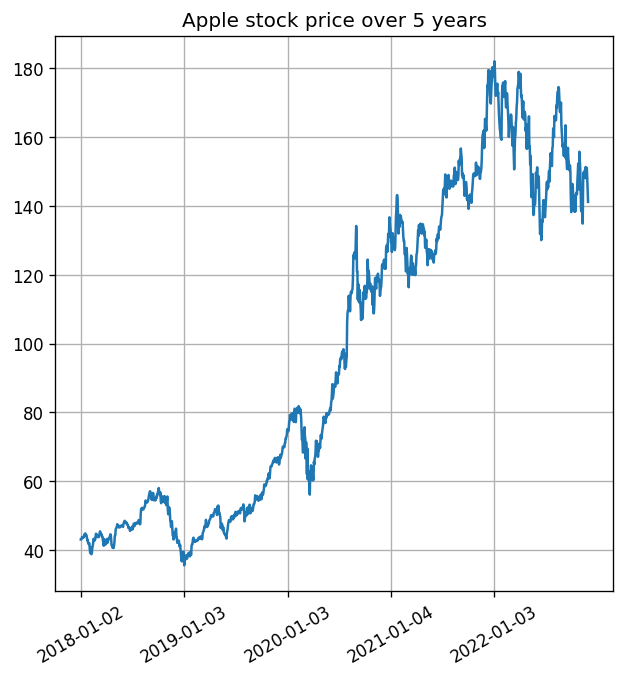

In [41]:
y = df['Close']
plt.figure(figsize=(6, 6))
plt.title('Apple stock price over 5 years')
plt.grid(True)
plt.xticks(np.arange(0, len(y), step=252), rotation=30)
plt.plot(y)
plt.show()

In [42]:
# First calculate the mid prices from the highest and lowest
high_prices = df['High']
low_prices = df['Low']
mid_prices = (high_prices+low_prices) / 2
len(mid_prices)

1237

In [49]:
# Check the stationarity of the model with an ADF
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(mid_prices.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -24.149436
p-value: 0.000000


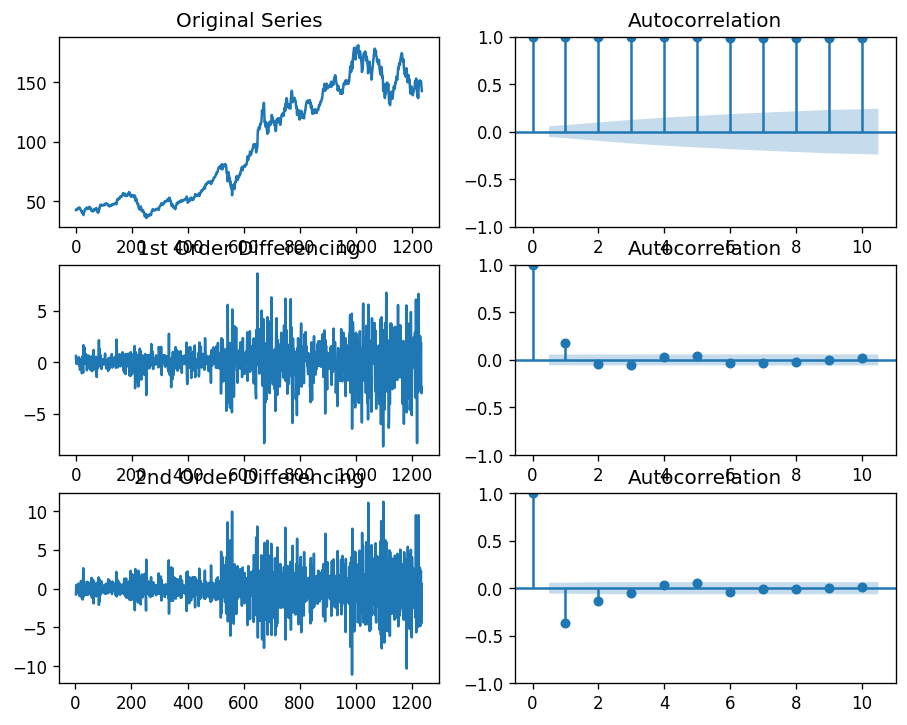

In [44]:
# As the p-value is above 0.05, we will differenciate the serie and check the autocorrelation plot
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
n_lags = 10

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(mid_prices.values); axes[0, 0].set_title('Original Series')
plot_acf(mid_prices.values, ax=axes[0, 1], lags=n_lags)

# 1st Differencing
axes[1, 0].plot(mid_prices.diff().values); axes[1, 0].set_title('1st Order Differencing')
plot_acf(mid_prices.diff().dropna(), ax=axes[1, 1], lags=n_lags)

# 2nd Differencing
axes[2, 0].plot(mid_prices.diff().diff().values); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(mid_prices.diff().diff().dropna(), ax=axes[2, 1], lags=n_lags)

plt.show()

In [45]:
# Differentiate the signal once, to get the stationarity
mid_prices = mid_prices.diff()

In [ ]:
# Scale the dataset


In [46]:
n_elems = len(mid_prices)
train_set_ratio = 0.8
train_size = round(n_elems * train_set_ratio)
train_data = mid_prices[:train_size]
test_data = mid_prices[train_size:]

In [47]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()

In [48]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

KeyError: 'key of type tuple not found and not a MultiIndex'